# The Normal Distribution and T-Tests for Hypothesis Testing

In [1]:
from pandas import *
import itertools
import numpy as np
import math
import random
import matplotlib
import matplotlib.pyplot as  plt
import plotly
import scipy
import scipy.stats as stats
plt.rcParams["patch.force_edgecolor"] = True
plt.rcParams['grid.linestyle'] = 'dotted'
plt.rcParams['grid.linewidth'] = .5

### Random Variables, Frequency and Probability Distributions, and The Normal Curve

* Random variable: maps the possible outcomes of a random event to numbers which represent its possible values: e.g. for a coin flip: $X = \begin{cases} 1, & \text{if heads.}\\ 0, & \text{if tails.}\end{cases}$ 
* <mark>In the frequentist framework, probabilities are thought of as long-run relative frequency proportions for the values random variables can take.</mark>
* Imagine we have a fair die, with equal probability of any of its possible outcomes per roll (1 to 6), and <mark>roll the die 1000 times.</mark>

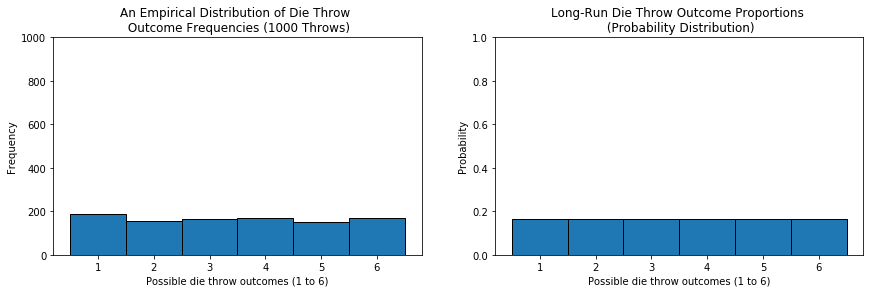

In [13]:
random.seed(123)
x = [1, 2, 3, 4, 5, 6]
ntrials = 1000
rollOutcomes = [random.randint(1, 6) for roll in range(ntrials)]
one = len([n for n in rollOutcomes if n == 1])
two = len([n for n in rollOutcomes if n == 2])
three = len([n for n in rollOutcomes if n == 3])
four = len([n for n in rollOutcomes if n == 4])
five = len([n for n in rollOutcomes if n == 5])
six = len([n for n in rollOutcomes if n == 6])
freqs = [one, two, three, four, five, six]
              
plt.subplot(1, 2, 1)                
plt.bar(x, freqs, width = 1)
plt.ylim(0,1000)
plt.xlabel('Possible die throw outcomes (1 to 6)')
plt.ylabel('Frequency')
plt.title('An Empirical Distribution of Die Throw \n Outcome Frequencies (1000 Throws)')

plt.subplot(1, 2, 2)
plt.bar(x, [1/6, 1/6, 1/6, 1/6, 1/6, 1/6], width = 1)
plt.ylim(0,1)
plt.xlabel('Possible die throw outcomes (1 to 6)')
plt.ylabel('Probability')
plt.title('Long-Run Die Throw Outcome Proportions \n (Probability Distribution)')
plt.subplots_adjust(right = 2)
plt.show()


* What value do we expect to roll, as the long run average? <mark>The expected value of a probability distribution is the mean of the distribution.</mark> Each possible value is weighted by the same probability here, $\frac{1}{6}$. So if our random variable for a die throw is D, $E(D) = \frac{1}{6}(1 + 2 + 3 + 4 + 5 + 6) = 3.5$. <mark>In general, the expected value, or mean of a random variable, is the probability-weighted sum of  all its possible values, i.e. $E(X) = \sum_i{x_ip_i}$.</mark>
* How much do we expect the die rolls to vary (or what is the "spread" of its probability distribution)? <mark>The variance is the average squared distance of each value from the mean</mark>, i.e. $E[(x - E(X))^2] = \frac{(1 - 3.5)^2 +(2 - 3.5)^2 + (3 - 3.5)^2 +(4 - 3.5)^2 + (5 - 3.5)^2 + (6 - 3.5)^2}{6} = 2.92$. Taking the square root of the variance yields the standard deviation, which gives a metric of spread from the mean in the same units of the mean (e.g., for height $inches$ instead of $inches^2$.
* The probability of rolling a 5 or 6 is 1 * 1/6 + 1 * 5/6 = 1/3. <mark>Probabilities over a range of values, in probability distributions, correspond to their associated areas.</mark>
* <mark>If we roll two dice, sum the roll values</mark>, and repeat many times, the empirical frequency and the probability distributions look like:

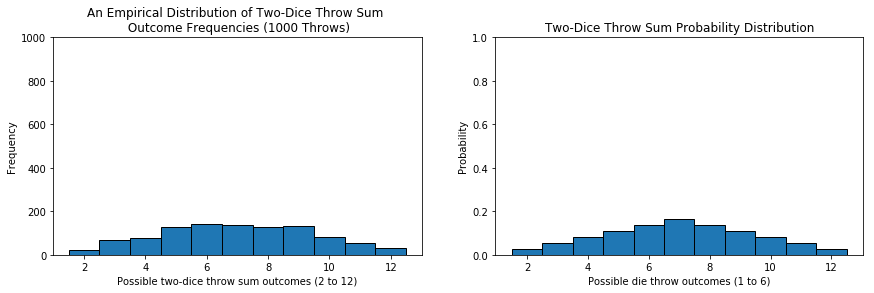

In [20]:
random.seed(123)
x1 = [1, 2, 3, 4, 5, 6]
x2 = [1, 2, 3, 4, 5, 6]
xSum = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
ntrials = 1000
rollOutcomes_x1 = [random.randint(1, 6) for roll in range(ntrials)]
rollOutcomes_x2 = [random.randint(1, 6) for roll in range(ntrials)]
rollOutcomes_xSum = [rollOutcomes_x1[i] + rollOutcomes_x2[i] for i in range(len(rollOutcomes_x1))]

two = len([n for n in rollOutcomes_xSum if n == 2])
three = len([n for n in rollOutcomes_xSum if n == 3])
four = len([n for n in rollOutcomes_xSum if n == 4])
five = len([n for n in rollOutcomes_xSum if n == 5])
six = len([n for n in rollOutcomes_xSum if n == 6])
seven = len([n for n in rollOutcomes_xSum if n == 7])
eight = len([n for n in rollOutcomes_xSum if n == 8])
nine = len([n for n in rollOutcomes_xSum if n == 9])
ten = len([n for n in rollOutcomes_xSum if n == 10])
eleven = len([n for n in rollOutcomes_xSum if n == 11])
twelve = len([n for n in rollOutcomes_xSum if n == 12]) 
freqs = [two, three, four, five, six, seven, eight, nine, ten, eleven, twelve]
              
plt.subplot(1, 2, 1)              
plt.bar(xSum, freqs, width = 1)
plt.ylim(0,1000)
plt.xlim(1, 13)
plt.xlabel('Possible two-dice throw sum outcomes (2 to 12)')
plt.ylabel('Frequency')
plt.title('An Empirical Distribution of Two-Dice Throw Sum \n Outcome Frequencies (1000 Throws)')

plt.subplot(1, 2, 2)
plt.bar(xSum, [1/36, 2/36, 3/36, 4/36, 5/36, 6/36, 5/36, 4/36, 3/36, 2/36, 1/36], width = 1)
plt.ylim(0,1)
plt.xlabel('Possible die throw outcomes (1 to 6)')
plt.ylabel('Probability')
plt.title('Two-Dice Throw Sum Probability Distribution')
plt.subplots_adjust(right = 2)
plt.show()


* <mark>The probabilties can be reasoned out by counting the number of sum-values out of each of 36 possible combinations of the die_1 and die_2 outcomes on a given roll</mark>.
* The sum of values for a roll of two dice, as the sum of two independent random variables, is itself a random variable. Its mean can be worked out as 7, the sum of  the means of each component random variable. In general, <mark>for a random variable Z that is the sum of two independent random variables X and Y, $E(Z) = E(X) + E(Y)$</mark>
* Likewise, the expected value of the difference of two RVs is the difference of their expected values.
* The variance of our probability distribution for the sum of 2 dice throws can be worked out as 5.84. In general, <mark>the variance of the sum of 2 independent RVs is the sum of the variances</mark>. The variance of the difference is also the sum of the variances.


#### The Normal Probability Distribution and The Central Limit Theorem
<mark>The normal distribution is often applied for estimating the distribution of a metric (e.g., height) over a population.</mark>
To standardize a distribution, one gets its mean to zero by subtracting the orignal mean from each value, and its variance (and standard deviation) to 1 by dividing every value by the orignal standard deviation. A Normal probability distribution, in terms of the probability density for a value $x$, given a standardized mean and variance, is defined precisely as $P(x) = \frac{1}{\sqrt{2\pi}}e^{\frac{-x^2}{2}}$. (Continous random variables can only have probabilities assigned to intervals). The distribution curve looks like:

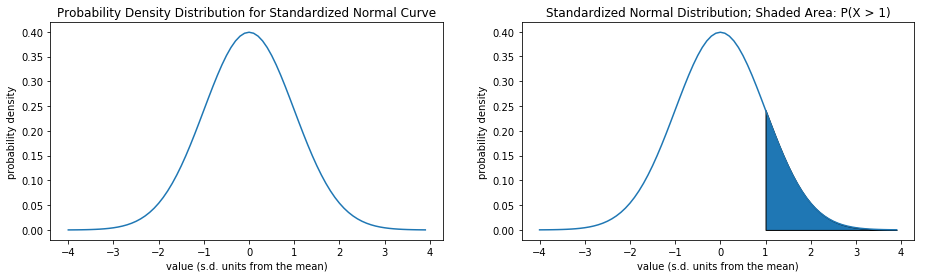

In [4]:

def norm_dist_shade_p_less(x, fill_less):
    y = stats.norm.pdf(x)
    fill_less_vals = x[x <= fill_less]
    plt.plot(x, y)
    plt.xlabel('value (s.d. units from the mean)')
    plt.ylabel('probability density')
    plt.fill_between(fill_less_vals, 0, stats.norm.pdf(fill_less_vals))
    plt.title('Standardized Normal Distribution: Shaded Area: P(X < ' + str(fill_less) + ')')
    
def norm_dist_shade_p_greater(x, fill_greater):
    y = stats.norm.pdf(x)
    fill_greater_vals = x[x >= fill_greater]
    plt.plot(x, y)
    plt.xlabel('value (s.d. units from the mean)')
    plt.ylabel('probability density')
    plt.fill_between(fill_greater_vals, 0, stats.norm.pdf(fill_greater_vals))
    plt.title('Standardized Normal Distribution; Shaded Area: P(X > ' + str(fill_greater) + ')')
    
def t_dist_shade_p_greater(x, df, fill_greater):
    y = stats.t.pdf(x, df)
    fill_greater_vals = x[x >= fill_greater]
    plt.plot(x, y)
    plt.xlabel('value (s.d. units from the mean)')
    plt.ylabel('probability density')
    plt.fill_between(fill_greater_vals, 0, stats.t.pdf(fill_greater_vals, df))
    plt.title('Standardized t-distribution(df = ' + str(df) + '), ' +'Shaded Area: P(X > ' + str(fill_greater) + ')')

def t_dist_shade_p_less(x, df, fill_less):
    y = stats.t.pdf(x, df)
    fill_less_vals = x[x <= fill_less]
    plt.plot(x, y)
    plt.xlabel('value (s.d. units from the mean)')
    plt.ylabel('probability density')
    plt.fill_between(fill_less_vals, 0, stats.t.pdf(fill_less_vals, df))
    plt.title('Standardized t-distribution(df = ' + str(df) + '), ' +'Shaded Area: P(X < ' + str(fill_less) + ')')
    
def t_dist_shade_p_both(x, df, fill_less, fill_greater):
    y = stats.t.pdf(x, df)
    fill_less_vals = x[x <= fill_less]
    fill_greater_vals = x[x >= fill_greater]
    plt.plot(x, y)
    plt.xlabel('value (s.d. units from the mean)')
    plt.ylabel('probability density')
    plt.fill_between(fill_less_vals, 0, stats.t.pdf(fill_less_vals, df), color = 'blue')
    plt.fill_between(fill_greater_vals, 0, stats.t.pdf(fill_greater_vals, df), color = 'blue')
    plt.title('Standardized t-distribution(df = ' + str(df) + '), ' + 'Shaded Area: P(X > ' + str(fill_greater) + ' or X < ' + str(fill_less) +')')
    
plt.subplot(1, 2, 1)
m = 0
sd = 1
x = np.arange(-4, 4, .1)
plt.plot(x,scipy.stats.norm.pdf(x, m, sd))
plt.xlabel('value (s.d. units from the mean)')
plt.ylabel('probability density')
plt.title('Probability Density Distribution for Standardized Normal Curve')

plt.subplot(1, 2, 2)
x = np.arange(-4, 4, .1)
norm_dist_shade_p_greater(x, 1)
plt.subplots_adjust(left = 0, right = 2)
plt.show()


<mark>Imagine there's a population, e.g. a city, which has an approximately normal distribution of memory-ability according to a test we've developed. The population mean score is 50. The standard deviation is 10</mark>. What is the probability that a randomly sampled individual from the population has a memory score of at least 60?
* <mark>The score of 70 corresponds to a score that is $\frac{60 - 50}{10} = 1.0$ standard deviations greater than the mean</mark>. A score at least that much greater than the mean corresponds to the area under the curve to the right of 1.0 in the standardized normal curve, for the probability. I.e. a z score of 1 or greater <mark>corresponds to a probability of 0.159 = 15.9%.</mark>

<mark>The Central Limit Theorem entails that if one takes independent random variable samples that come from the same probability distribution, and takes their mean (e.g. roll a die 7 times, and take the mean value of the rolls, or measure the memory-score of 7 randomly and independently chosen individuals from a population, and compute the mean score) the longrun probability distribution of many such sample-means, (i.e. the sampling distribution) approaches a normal distribution (as the sample size gets larger).</mark>

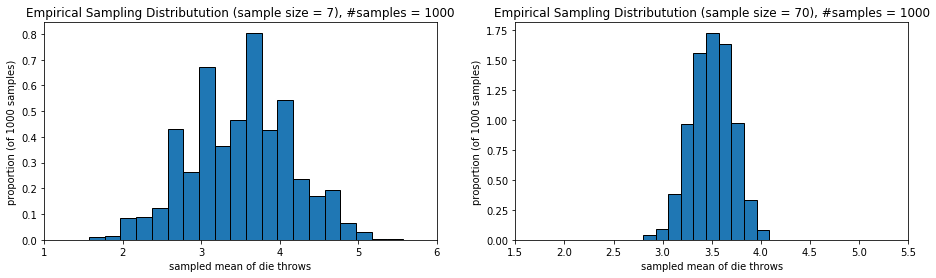

In [5]:
def sample_taker(sampleSize):
    rolls = []
    for i in range(sampleSize):
        rolls.append(random.randint(1,6))
    return np.mean(rolls)

def sampling_distribution_maker(sampleSize, nSamples):
    sampling_distribution = []
    for i in range(nSamples):
        sampling_distribution.append(sample_taker(sampleSize))
    return sampling_distribution
        
random.seed(123)
sampleMeans1 = sampling_distribution_maker(7, 1000)
sampleMeans2 = sampling_distribution_maker(70, 1000)

plt.subplot(1,2,1)
plt.hist(sampleMeans1, density = True, bins = 20)
plt.xlim(1, 6)
plt.xlabel('sampled mean of die throws')
plt.ylabel('proportion (of 1000 samples)')
plt.title('Empirical Sampling Distributution (sample size = 7), #samples = 1000')


plt.subplot(1,2,2)
plt.hist(sampleMeans2, density = True, bins = 10)
plt.xlim(1.5, 5.5)
plt.xlabel('sampled mean of die throws')
plt.ylabel('proportion (of 1000 samples)')
plt.title('Empirical Sampling Distributution (sample size = 70), #samples = 1000')
plt.subplots_adjust(left = 0, right = 2)
plt.show()



* <mark>The normal distribution can therefore be used to approximate the sampling distribution of sample means of a metric.</mark> Doing so assumes an independent, simple random sampling procedure.
* <mark>This approximation will be more accurate the more close to normal the distribution of the metric is in the population, and the greater the sample-size.</mark>
* The mean of the sampling distribution is the expected value of the random variable (e.g. 3.5 for the sampling distribution of sample means of a dice roll). 
* Also, greater sample sizes shrink the standard deviation of the sampling distribution, also known as the standard error. Specifically, the variance of the sampling distribution is the variance of the random variable divided by the sample size.

## Applying a t-distribution for Hypothesis Testing

* Typically, to estimate the standard error (s.d. for the sampling distribution), we use the sample s.d., $s = \sqrt{ \frac{1}{n-1}\sum_{i}(x_i - \bar{X})^2}$, which divides the sum of squared distances from the sample mean by $n - 1$ rather than $n$, to serve as an unbiased estimator of the population s.d.
* For relatively small sample sizes (e.g., less than n = 30) and <mark>with $s$ estimating $\sigma$ the sampling distribution is different enough from a normal distribution that it is better to use a t-distribution.</mark>
* For a t-distribution representing the sampling distribution, a sample from a <mark>normally distributed population is assumed.</mark> 
* <mark>A t-distribution is like a normal distribution, i.e. is symmetric and peaks in the center, but with fatter tails and a shorter peak (i.e., "weighting" more of the probablity away from the center).</mark>
* t-distributions vary depending on the degrees of freedom (n - 1, for a single independent sample), and converge toward a normal distribution as the d.f get larger.


### Hypothesis Testing, t-tests, and p-values

<mark>A researcher hypothesizes that a city has a mean score on our memory test that's less than 50, due to a specific kind of pollution. He takes a random sample of 12 people from the city, and their mean score is 44.5, with a sample standard deviation of 24.25.</mark>

* <mark>Basic strategy for hypothesis testing: 1) specify a null hypothesis; 2) estimate what the sampling distribution of the sample metric statistic looks like, if the null hypothesis is true. 3) Measure how far away from the mean of the sampling distribution the sample metric is (e.g., its t-score, or s.d. units for the t-distribution). 4) If the corresponding p-value for the t-score is small enough, compared to a preset threshold (e.g., less than 5% of the t-distribution area), this is taken as evidence against our assumption for the sampling distribution (i.e., against the null hypothesis), and so the null hypothesis is rejected.</mark>  
* To apply a t-distribution to hypothesis testing, first a null hypothesis is specified, which here is:
$H_0 : \mu_{city} - 50 >= 0$, where $\mu_{city}$ is what the mean score would be if everyone in the population (the city) took the test.  
* Thus the null hypothesis is that, at the population level, nothing interesting is going on, that the city does not have a  population mean score on the memory test that's lower than 50,  and that any divergence in the sample mean from the expected value (population mean under the null hypothesis) is due purely to chance.
* The alternative hypothesis if defined in relation to the null hypotheisis, and in the current scenario it is that the city population mean score is less than 50: $H_0 : \mu_{city} - 50 < 0$
* The basic idea is that we estimate the proability, _assuming the null hypothesis is true_, of obtaining a sample mean at least as divergent from the population mean as the one we got. A larger t-score corresponds to a lower p-value, which represents this probablity.
* For the current example, the standard error (s.d. of the sampling distribution) is estimated as: $se = \frac{\sigma}{\sqrt{n}} \approx \frac{s}{\sqrt{n}} = \frac{14.25}{\sqrt{12}} = 4.11$. Therefore our t-score is estimated as $t_{11} = \frac{\bar{X} - mu_{city \  | \ H_{0}}}{4.11}$ = \frac{44.5 - 50}{4.11} = -1.34. Thus in the t-distribution with d.f. = 11, which approximates our sampling distribution, assuming the null hypothesis, we got a sample score 1.34 s.d. units lower than the sampling distribution mean. This corresponds to a p-value (area to the left of -1.34) of 0.11 (as in the figure below:



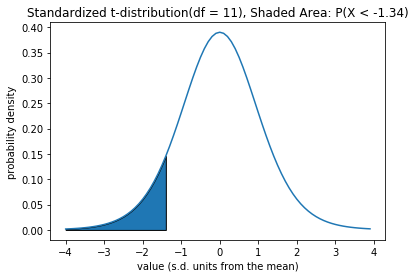

In [6]:
t_dist_shade_p_less(x, 11, -1.34)
plt.show()

* <mark>Therefore, under the null hypothesis that the city's mean memory score is not lower than 50, and assuming the t-distribution accurately approximates the sampling distribution (e.g., that the population distribution on the memory test is normal), there is an 11% chance of getting a sample mean as low or lower than the memory test as low or lower as the one for our sample.</mark>
* In general, frequentist hypothesis testing involves determining whether the sample data had a "low enough" chance to occur under the sampling distribution for the null hypothesis. Usually a threshold, or Type I error rate (the rate of rejecting $H_0$ when it is true) of less-than 0.05 is preset. As our p-value (probability of getting a sample mean as low relative to the population mean, under the null hypothesis) is not under this threshold, we do not reject the null hypothesis.

<mark>A researcher develops a drug which is hypothesized to affect memory (either positively or negatively). A random sample is taken from the population, which is randomly and indepdently split into a control group (whch gets a placebo drug which the participants are told may hurt or help their memory) and the treatment group, which gets drug of interest. Each group's mean score on the memory test is measured.</mark> For each group, $n = 10$. $\bar{X}_t = 65; \bar{X}_c = 55; s_t = 8; s_c = 10$
* <mark>$H_0: \mu_t = \mu_c$. Therefore under the null hypothesis, we have two indepdendent random variables from a single population. The difference between them is itself a random variable with an EV of 0.</mark>
* Based on the variance of the difference being the sum of the variance, the sample s.d. estimate for the difference between $bar{X}_t$ and $bar{X}_t$ is estimated as $s_{pooled} = \sqrt{\frac{(s_t^2 + s_c^2)}{n_t + n_c - 2}} = 9.06$. The standard error for the null sampling distribution is estimated as: $s_{pooled}\sqrt{\frac{1}{n_t} + \frac{1}{n_c}} = 9.06(\sqrt{2}) = 4.05$
* Since under $H_0$ our expected value for the difference is zero, the $t_{18}$ score, or number of standard errors our sample mean of the differences is away from the sampling distribution mean, is: $\frac{\bar{X}_t - \bar{X}_c}{4.05} = \frac{65 - 55}{4.05} = 2.47$
* <mark>Note that as in this example the researcher would count a sample mean far enough away from the null hypothesis mean in _either_ direction, the p-value is calcuated as the area to the right of 2.47, _and_ to the left of -2.47</mark>. Nonetheless, the p-value is still 0.024, so if $\alpha$ has been set at 0.05, we reject the null hypothesis. The interpretation is that, assuming the null hypothesis, the sample mean we got is improbable, and so this counts as evidence against the null hypothesis (in an indirect way).

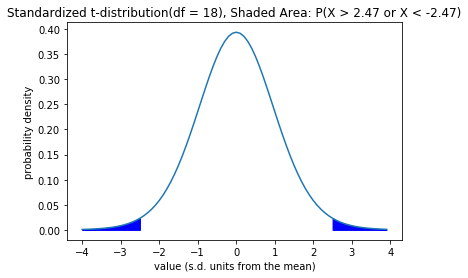

In [7]:
t_dist_shade_p_both(x, 18, -2.47, 2.47)
plt.show()

### Frequentist Hypothesis Testing, Sensitivity and Predictive Precision

<mark>Suppose a doctor develops a diagnostic test for a rare disease. For the table below, the columns indicate the ground truth (whether an individual does not have a disease (F.dis), vs. does (T.dis)), and the rows are the diagnostic test results, i.e. testing negative vs. positive for the disease according to the test:</mark>

|       | F.dis| T.dis |
|-------|------|-------|
| test- | 100  | 1     |
| test+ | 4    | 2     |

* Testing positive for the disease is analogous to a hypothesis test that results in rejection of $H_0$.

* The diagnostic test has a false-positive rate of $\frac{N(F.dis \ AND \  test+)}{N(F.dis)} = \frac{4}{100 + 4} = 0.038$. That is, P(test+ | F.dis) = 3.8% Usually, the false positive, or Type I error rate in hypothesis testing (probability of rejecting the null hypothesis, when it is true) is set as $\alpha = 0.05$
* <mark>Sensitivity, or recall, is the proportion of those who have the disease who correctly test as such. Here, $\frac{2}{2 + 1} = \frac{2}{3}$. In hypothesis testing, there is often tension or trade-offs between acheiving high sensitivity (true-positive rate) and low Type I error (false-positive rate).</mark> For instance, increasing the sensitivity of the test to pick up the T.dis individual that is missed in the current diagnostic test, may result in a _generally_ higher test+ rate, and hence generate a side effect of shooting up the false+ rate.
* <mark>Positive predictive value (ppv), or precision, represents, of those who test+ for the disease, the proportion who actually have it, i.e. $P(T.dis\ |\ test+)$. So here it's $\frac{2}{2 + 4} = 0.333 = 33.3\%$</mark> 

* Therefore a key point in this example: just because the diagnostic test has a low false positive rate, does not entail that we have a high predictive precision.
* <mark>Therefore just because a hypothesis test has a low Type I error rate, does not mean that it has a high positive pedictive precision. That is, it may be the case that a given test will only incorrectly reject the null hypothesis less than 5% of the time. But it can still be that the cases for which the null hypothesis are rejected are only in fact true say, 33.3% of the time. This can occur when the number of True cases are low compared to the number of False cases.</mark>
* <mark>This is related to the consideration that a hypothesis test gives us only the $P(data \ |\ H_{0})$. If this probability is low enough (e.g., if the probability of getting a sample mean as distant from the hypothesized null mean is low enough, assuming the null hypothesis), this is interpreted as sufficient grounds to reject the null hypothesis. But we don't in fact actually have $P(H_{alt} \ | \ data)$</mark>